<div class="alert alert-block alert-success">
<h1>Number Cross</h1>
<h4>AUGUST 2015: PUZZLE</h4>
</div>

<img src="https://www.janestreet.com/puzzles/number_crossword_2.png" width=720 height=20 />

The puzzle was publised at https://www.janestreet.com/puzzles/number-cross-2-index/

Fill the cells in this crossword with the digits 1 through 9 (no zeroes). Each clue in this crossword represents either the sum of the digits or the product of the digits in its corresponding answer - it's up to you to decide which. The clue could potentially represent both the sum and the product, if the sum and product are the same. Digits can be repeated within an answer, and answers can be repeated in the grid.

As your answer, submit the sum of all of the digits you entered into the completed grid.

<div class="alert alert-block alert-warning">
    <h1>Break down the problem</h1>
</div>

In order to solve this 9 x 9 grid puzzle, we have to:

**Requirement**

* Place the digits from 1 to 9 (no zeroes) in the grid to satisfy all of the provided clues.
* You need to indicate whether each clue represents the sum or the product of the inputted digits.
* Of course, a clue could be both the sum and the product. For example, if a clue asks the number 6, the digits could be 1, 2, 3, and that clue will represent the sum of 6 or the product of 6.
* Digits can be repeated within a clue (e.g., 323, 232, 555 ...)
* Answers can be used more than once within the puzzle.

**Submission**
The sum of all the digits in the completed grid is your submission to the puzzle.

<div class="alert alert-info">
  <h1>Solution</h1>
</div>

In [36]:
import numpy as np
import time
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
from z3 import *

## Create a 9x9 grid as the question

In [37]:
# The white cell will be 0, while the black cell will be 1
grid = np.array(
                [[0, 0, 0, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0],
                 [1, 0, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 1],
                 [0, 0, 1, 0, 0, 0, 1, 0, 0],
                 [1, 1, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 1],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0]
                ], dtype=int)

## Set up utility functions

In [38]:
def make_across(row,start,length,total):
    """
    Create the variables for the grid entry reading across
    
    Parameters:
    x: the rows' positions.
    start: the first position that the entry grid starts
    length: the number of digit needs to be entered.
    total: the clue's value
    
    Return: a z3 object contained the bool decisions for a given grid entry.
    E.g., Clue #1: Or(x__0 + x__1 + x__2 + x__3 == 9, x__0*x__1*x__2*x__3 == 9)
    """
    clue = [X[row,i] for i in range(start,start+length)]
    return  Or(Sum(clue)==total,Product(clue)==total)

def make_down(col,start,length,total):
    """
    Create the variables for the grid entry reading down
    
    Parameters:
    x: the columns' positions.
    start: the first position that the entry grid starts
    length: the number of digit needs to be entered.
    total: the clue's value
    
    Return: a z3 object contained the bool decisions for a given grid entry.
    E.g., Clue #1: Or(x__0 + x__9 == 45, x__0*x__9 == 45)
    """
    clue = [X[i,col] for i in range(start,start+length)]    
    return  Or(Sum(clue)==total,Product(clue)==total)

## Set up solver and matrix

In [39]:
# Setup # 9x9 matrix of integer variables and solver 
X = np.array(IntVector("x",9*9),dtype=object).reshape((9,9))
s = Tactic("qflia").solver()

### QF_LIA Logic

**QF_LIA** stands for "Quantifier-Free Linear Integer Arithmetic," and it is a logical theory within the realm of formal logic and automated theorem proving. This theory is used to express and reason about constraints and formulas involving linear integer arithmetic operations. 
* **Quantifier-Free**: In QF_LIA, formulas and constraints do not contain quantifiers like "for all" (∀) or "there exists" (∃).
* **Linear Integer Arithmetic**: QF_LIA focuses on linear relationships between integer variables. It deals with basic integer arithmetic operations, including addition, subtraction, and comparison operations (e.g., less than, greater than, less than or equal to, greater than or equal to).

## Cell conditions

In [40]:
# each cell contains a value 1-9 or is blocked
s += [And(e>0,e<=9) if grid[i,j] !=1 else e==0 for (i,j),e in np.ndenumerate(X)]

## Set up the clues

In [41]:
s += make_across(0,0,4,9)   #1
s += make_across(0,5,4,35)  #5
s += make_across(1,0,4,10)  #9            
s += make_across(1,5,4,30)  #10  
s += make_across(2,1,4,7)   #11  
s += make_across(2,6,3,10)  #13   
s += make_across(3,0,7,42)  #14  
s += make_across(4,0,2,21)  #16  
s += make_across(4,3,3,25)  #17 
s += make_across(4,7,2,15)  #18 
s += make_across(5,2,7,120) #20
s += make_across(6,0,3,25)  #22
s += make_across(6,4,4,35)  #24
s += make_across(7,0,4,21)  #25
s += make_across(7,5,4,9)   #27
s += make_across(8,0,4,5)   #29
s += make_across(8,5,4,8)   #30

s += make_down(0,0,2,45) #1
s += make_down(1,0,5,20) #2
s += make_down(2,0,4,48) #3
s += make_down(3,0,6,72) #4
s += make_down(5,0,2,18) #5
s += make_down(6,0,4,24) #6
s += make_down(7,0,3,27) #7
s += make_down(8,0,3,26) #8
s += make_down(4,2,5,12) #12
s += make_down(0,3,2,18) #14
s += make_down(5,3,6,32) #15
s += make_down(7,4,5,45) #18
s += make_down(8,4,2,20) #19
s += make_down(2,5,4,30) #20
s += make_down(6,5,4,12) #21
s += make_down(0,6,3,70) #22
s += make_down(1,6,3,12) #23
s += make_down(3,7,2,2)  #26
s += make_down(8,7,2,36) #28

## Solve and print the result

**Solved in 114.1757 seconds. Solution is: 276**

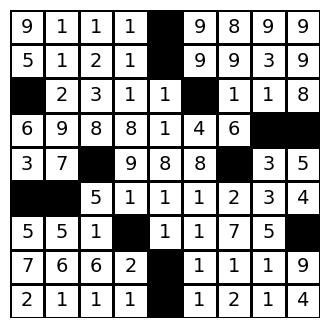

In [42]:
# Solve and print 
start = time.time()
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    r = evalu(X)
else:
    print("Failed")

display(Markdown("**Solved in {:.4f} seconds. Solution is: {:.0f}**".
                 format(time.time()-start,np.sum(r))))

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax =sns.heatmap(grid,annot=r,cbar=False,cmap="Greys",
                fmt="",linewidths=2,annot_kws={"size":14,"color":"k"},linecolor='k')
ax.axis("off")
plt.show()

<div class="alert alert-info">
  <h1>Public Solution</h1>
</div>

<img src="https://www.janestreet.com/puzzles/number_crossword_2_solution.png" width=720 height=50 />

The BEST SOLUTION was publised at https://www.janestreet.com/puzzles/number-cross-2-solution/